In [1]:
# Loading data

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# Import the data of a CSV file into a numpy array
cats = genfromtxt('cat.csv', delimiter=',') # 80 cats (one in a column) each by 4096 pixels
dogs = genfromtxt('dog.csv', delimiter=',') # 80 dogs (one in a column) each by 4096 pixels

# Combine two arrays (cats and dogs) into one (pets)
pets = np.empty([160, 4096]) # empty array of size 160 x 4096
for m in range(80):
    pets[m,:] = np.reshape(np.transpose(np.reshape(cats[:,m], (64,64))), (1,4096)) # cats in the first 80 rows (one in a row)
    pets[m+80,:] = np.reshape(np.transpose(np.reshape(dogs[:,m], (64,64))), (1,4096)) # dogs in the other 80 rows (one in a row)

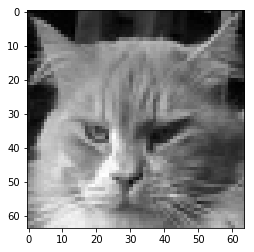

In [2]:
# Function to show an image
def show_what(some_vector):
    import numpy as np
    import matplotlib.pyplot as plt
    # reshape the input data to an image of 64x64 pixels and show it
    plt.imshow(np.reshape(some_vector, (64, 64)), cmap = "gray")
    plt.show()
    return

pet = pets[71, :] # get a pet vector
show_what(pet) # test it

In [3]:
%%time
# Applying data visualization algorithms

# t-SNE algorithm 
from MulticoreTSNE import MulticoreTSNE as tsne
tsne_data = tsne().fit_transform(pets) # to pets

# PCA algorithm
from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components=3) # set the number of principal components
ipca_data = ipca.fit_transform(pets) # pca to pets

Wall time: 1.65 s


In [53]:
# Function to visualize the transformed data on interactive scatter plot (2D or 3D)
#
# input args: data - data to be visualized, init_data - initial data,
#             color - coloring information, title - plot title, axes - axes labels

def ShowScatterPlot(data, init_data, color, title, axes):
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Function to handle a pick event
    def show_on_click(event):
        
        ind = event.ind #indices of a pick event
        # reshape the i-th row of initial data to an image of 64x64 pixels and show it
        for i in ind:
            plt.figure()
            plt.imshow(np.reshape(init_data[i,:], (64, 64)), cmap = "gray")
            plt.title('Pet %i' %i)
            plt.show()
    
    # 2D scatter plot
    def ScatterPlot2D():
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(data[:,0], data[:,1], c = color, picker = True)
        ax.set_title(title)
        ax.set_xlabel(axes[0])
        ax.set_ylabel(axes[1])
        plt.show()
        fig.canvas.mpl_connect('pick_event', show_on_click)
        
     # 3D scatter plot    
    def ScatterPlot3D():
        
        from mpl_toolkits.mplot3d import Axes3D

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:,0], data[:,1], data[:,2], c = color, picker = True)
        ax.set_title(title)
        ax.set_xlabel(axes[0])
        ax.set_ylabel(axes[1])
        ax.set_zlabel(axes[2])
        plt.show()
        fig.canvas.mpl_connect('pick_event', show_on_click)
    
    # find number of columns in data
    plot_type = data.shape[1]
    
    # decide what plot type is required
    if plot_type == 2:
        ScatterPlot2D()
    elif plot_type == 3:
        ScatterPlot3D()
    else:
        print('Inappropriate input data dimensions for 2D/3D plot')

In [54]:
# Define the colors for plot
color = np.concatenate((np.zeros(80), np.ones(80)), axis=0) # zeros for cats and ones for dogs

# show plots in separate windows
%matplotlib
plt.close('all')

Using matplotlib backend: Qt5Agg


In [55]:
ShowScatterPlot(tsne_data, pets, color, 't-SNE for pets', ['x', 'y'])

In [56]:
ShowScatterPlot(ipca_data, pets, color, 'PCA for pets', ['1st component', '2nd component','3rd component'])

In [57]:
# Converting data using edge detection

from skimage.filters import sobel

# apply sobel filter to pets and put result into a new array
edge_pets = np.empty([160, 4096])
for m in range(160):
    edge_pets[m,:] = np.reshape(sobel(np.reshape(pets[m,:], (64,64))), (1,4096))

In [58]:
%%time
# Applying data visualization algorithms

# t-SNE algorithm 
tsne_edge = tsne().fit_transform(edge_pets) # to edged pets

# PCA algorithm
ipca = IncrementalPCA(n_components=3) # set the number of principal components
ipca_edge = ipca.fit_transform(edge_pets) # pca to edged pets

Wall time: 1.28 s


In [59]:
ShowScatterPlot(tsne_edge, edge_pets, color, 't-SNE for pets (edge detection)', ['x', 'y'])

In [60]:
ShowScatterPlot(ipca_edge, edge_pets, color, 'PCA for pets (edge detection)', ['1st component', '2nd component','3rd component'])